# Data Importation and Preprocessing 

In [11]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

# Loading the data
data = pd.read_csv("C:/Users/User/Downloads/train.csv")

# Checking for missing values
print("No missing values in column:\n", data.isnull().sum())

# In case there are missing values, fill with the median of the column
data.fillna(data.median(), inplace=True)
data = data.iloc[:1000, :]

# Spliting the data into features and labels
X = data.drop(columns=['label']) 
y = data['label']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Outlier detection and removal
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X_filtered, y_filtered = X_scaled[mask], y[mask]

# Dimensionality reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_filtered)

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_filtered, test_size=0.2, random_state=42)

No missing values in column:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


## Visualisation

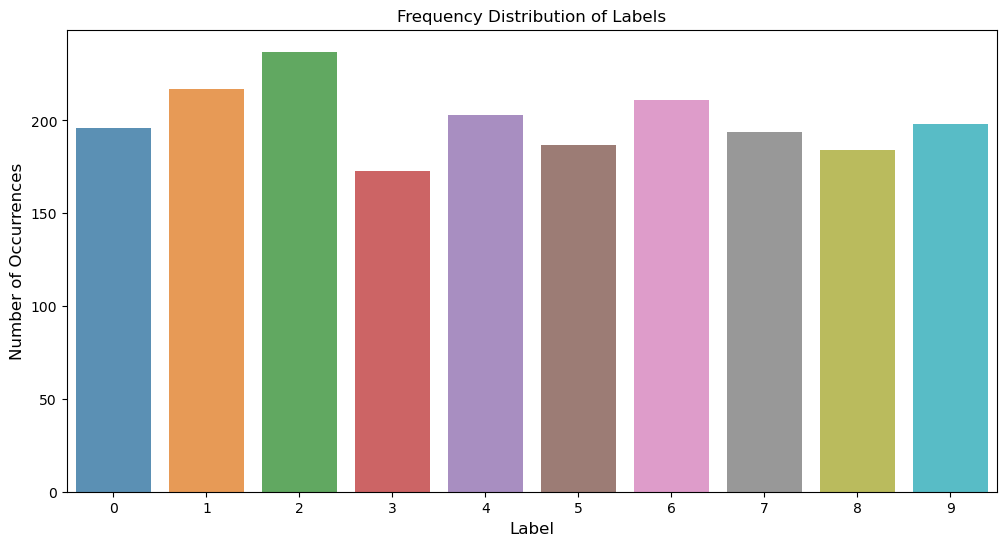

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = y.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.title('Frequency Distribution of Labels')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()



# Task 1 on Random Forest Classification

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ", rf_accuracy)

print("Random Forest Classifier Performance Metrics: ")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy:  0.8361111111111111
Random Forest Classifier Performance Metrics: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.86      0.93      0.89        40
           2       0.88      0.86      0.87        44
           3       0.82      0.78      0.80        36
           4       0.76      0.91      0.83        34
           5       0.79      0.74      0.77        31
           6       0.90      0.95      0.92        37
           7       0.93      0.80      0.86        49
           8       0.91      0.62      0.74        32
           9       0.63      0.84      0.72        32

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.83       360
weighted avg       0.85      0.84      0.84       360



# Task 2 Multi-Layer perceptron classifier (MLP)

In [12]:
from sklearn.metrics import classification_report

# Multi-layer Perceptron (MLP) Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='logistic', max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

y_pred_mlp = mlp_clf.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy: ", mlp_accuracy)

print("MLP Classifier Performance Metrics: \n", classification_report(y_test, y_pred_mlp))

print("Random Forest Classifier Accuracy: ", rf_accuracy)

if mlp_clf.n_iter_ == mlp_clf.max_iter:
    print("Warning: The maximum number of iterations was reached before convergence. Consider increasing the max_iter parameter.")



MLP Classifier Accuracy:  0.6777777777777778
MLP Classifier Performance Metrics: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.57      0.93      0.70        14
           2       0.72      0.50      0.59        26
           3       0.67      0.71      0.69        17
           4       0.83      0.79      0.81        24
           5       0.67      0.67      0.67        18
           6       0.67      0.67      0.67        15
           7       0.50      0.54      0.52        13
           8       0.75      0.50      0.60        18
           9       0.71      0.85      0.77        20

    accuracy                           0.68       180
   macro avg       0.67      0.68      0.67       180
weighted avg       0.69      0.68      0.67       180

Random Forest Classifier Accuracy:  0.8361111111111111


# Task 3 Convolutional Neural Network Model

In [5]:
# [DMID] Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import warnings

# [DMID] Suppress any warnings that might occur
warnings.filterwarnings('ignore')

# [DMID] Load the data
data = pd.read_csv("C:/Users/User/Downloads/fashion-mnist_train.csv")

# [DMID] Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# [DMID] In case there are missing values, fill with the median of the column
data.fillna(data.median(), inplace=True)

# [DMID] For simplicity, let's consider only the first 2000 rows
data = data.iloc[:2000, :]

# [DMID] Split the data into features and labels
X = data.drop(columns=['label'])  
y = data['label']

# [DMID] Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

# [DMID] Outlier detection and removal
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# [DMID] select all rows that are not outliers
mask = yhat != -1
X_filtered, y_filtered = X_scaled[mask], y[mask]

# [DMID] Reshape the data to fit the model
X_filtered = X_filtered.values.reshape(-1, 28, 28, 1)

# [DMID] One-hot encoding of the target variable
y_filtered = to_categorical(y_filtered)

# [DMID] Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# [DMID] Build the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# [DMID] Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# [DMID] Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# [DMID] Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# [DMID] Get the predicted classes
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# [DMID] Print the classification report
print(classification_report(y_true, y_pred))

print(f'CNN Model Accuracy: {accuracy}')


Missing values in each column:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Epoch 1/10
45/45 [==============================] - 3s 39ms/step - loss: 1.3545 - accuracy: 0.5410 - val_loss: 0.8908 - val_accuracy: 0.7083
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7504 - accuracy: 0.7306 - val_loss: 0.7367 - val_accuracy: 0.7750
Epoch 3/10
45/45 [==============================] - 1s 22ms/step - loss: 0.6195 - accuracy: 0.7618 - val_loss: 0.6813 - val_accuracy: 0.7750
Epoch 4/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5306 - accuracy: 0.8021 - val_loss: 0.7277 - val_accuracy: 0.7389
Epoch 5/10
45/45 [==============================] - 1s 24ms/step - loss: 0.5157 - accuracy: 0.7965 - val_loss: 0.6745 - val_accuracy: 0.7667
Epoch 6/10
45/45 [==============================] - 1s 22ms/step - loss: 0.4646 - a

# Task 4 Clustering Analysis and Evaluation

In [8]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import warnings 

# Suppressing any warnings that might occur
warnings.filterwarnings('ignore')

# Loading the data
data = pd.read_csv("C:/Users/User/Downloads/train.csv")

# Checking for missing values
print("Missing values in each column:\n", data.isnull().sum())

# In case there are missing values, fill with the median of the column
data.fillna(data.median(), inplace=True)

# For simplicity, let's consider only the first 2000 rows
data = data.iloc[:2000, :]

# Spliting the data into features and labels
X = data.drop(columns=['label']) 
y = data['label']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Convert numpy array back to DataFrame

# Outlier detection and removal
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_scaled)

# select all rows that are not outliers
mask = yhat != -1
X_filtered, y_filtered = X_scaled[mask], y[mask]

# Dimensionality reduction
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_filtered)

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_filtered, test_size=0.2, random_state=42)

print("Preprocessed data:\n", X_train[:5])

# Clustering

silhouette_scores = []  
K = range(2, 15)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))

# Finding the optimal number of clusters as the one with maximum silhouette score
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]

# Applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Predict the cluster labels: labels
labels = kmeans.predict(X_train)

# Calculate ARI and NMI
ari = adjusted_rand_score(y_train, labels)
nmi = normalized_mutual_info_score(y_train, labels)

print(f'Optimal number of clusters: {optimal_k}')
print(f'Adjusted Rand Index of the KMeans solution: {ari}')
print(f'Normalized Mutual Information of the KMeans solution: {nmi}')



Missing values in each column:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64
Preprocessed data:
 [[ 7.96345586 -5.11321113  5.17788053 ... -0.20056987 -0.31637098
  -0.21139111]
 [-4.39349242 14.6258755   1.47407233 ...  0.26970799  0.21727467
  -0.06884378]
 [-0.56624785 -8.2999677  -6.15622987 ...  0.52993596 -0.01710115
   0.54216499]
 [-3.18630805  0.59233107  3.77766713 ...  0.07011586 -0.21264525
   0.07656018]
 [ 8.30301163 -3.65946193  4.45148739 ...  0.50354826  1.22265654
  -0.50083338]]
Optimal number of clusters: 2
Adjusted Rand Index of the KMeans solution: 0.10308007378439996
Normalized Mutual Information of the KMeans solution: 0.2202895077554092
